<a href="https://colab.research.google.com/github/KUUROO17/FUZZY/blob/main/fuzzy_tugas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
!pip install scikit-fuzzy
!pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [25]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [26]:
# import skfuzzy.control as ctrl
import numpy as np
import skfuzzy as fz
import matplotlib.pyplot as plt
import pandas as pd

In [38]:
def variableFuzzy():
        # Nilai Semesta Variabel
        pop = np.arange(0, 1700000000, 1000)
        dens = np.arange(0, 23200, 0.01)
        grw = np.arange(0, 2.5, 0.01)
        per = np.arange(0, 20, 0.01)
        area = np.arange(0, 20000000, 30)
        pokok = np.arange(0, 10000, 100)


        # Variabel keanggotaan Low, Mid, High
        Pop_L = fz.trapmf(pop, [0, 0, 10000000, 34000000])
        Pop_M = fz.trimf(pop, [10000000, 34000000, 1400000000])
        Pop_H = fz.trapmf(pop, [34000000, 1400000000, 1700000000, 1700000000])

        Den_L = fz.trapmf(dens, [0, 0, 0.2, 452])
        Den_M = fz.trimf(dens, [0.2, 452, 23000])
        Den_H = fz.trapmf(dens, [452, 23000, 23500, 23500])

        grw_L = fz.trapmf(grw, [0, 0, 0.01, 1.008])
        grw_M = fz.trimf(grw, [0.01, 1.008, 1.8])
        grw_H = fz.trapmf(grw, [1.008, 1.8, 2, 2])

        per_L = fz.trapmf(per, [0, 0, 0.1, 6])
        per_M = fz.trimf(per, [0.1, 6, 17])
        per_H = fz.trapmf(per, [6, 17, 19, 19])

        area_L = fz.trapmf(area, [0, 0, 2000, 5000])
        area_M = fz.trimf(area, [50, 581000, 1700000])
        area_H = fz.trapmf(area, [581000, 1700000, 10000000, 10000000])

        # Output
        pokok_L = fz.trapmf(pokok, [0, 0, 20000, 80000])
        pokok_M = fz.trimf(pokok, [2000, 5000, 8000])
        pokok_H = fz.trapmf(pokok, [5000, 8000, 12000, 12000])

        variable = {
            'density':[
                dens,Den_L,Den_M,Den_H
            ],
            'growth rate':[
                grw, grw_L, grw_M, grw_H
            ],
            'area':[
                area, area_L, area_M, area_H
            ],
            'per':[
                per, per_L, per_M, per_H
            ],
            'population':[
                pop, Pop_L, Pop_M, Pop_H
            ],
            'school':[
                pokok, pokok_L, pokok_M, pokok_H
            ]
        }


        # ====== Plot Fungsi Keanggotaan ======
        print("=========================================================================")
        print("=========== PLOT ANTASENDENT DAN CONSEQUENT YANG DIGUNAKAN =============")
        print("=========================================================================")
        fig, (ax0, ax1, ax2, ax3, ax4, ax5) = plt.subplots(nrows=6, figsize=(10, 10))
        ax0.plot(dens, Den_L, 'g', label='low')
        ax0.plot(dens, Den_M, 'b', label='medium')
        ax0.plot(dens, Den_H, 'r', label='high')
        ax0.set_title('Density')
        ax0.legend()

        ax1.plot(grw, grw_L, 'g', label='low')
        ax1.plot(grw, grw_M, 'b', label='medium')
        ax1.plot(grw, grw_H, 'r', label='high')
        ax1.set_title('Growth Rate')
        ax1.legend()

        ax2.plot(per, per_L, 'g', label='low')
        ax2.plot(per, per_M, 'b', label='medium')
        ax2.plot(per, per_H, 'r', label='high')
        ax2.set_title('World Population Percentage')
        ax2.legend()

        ax3.plot(pop, Pop_L, 'g', label='low')
        ax3.plot(pop, Pop_M, 'b', label='medium')
        ax3.plot(pop, Pop_H, 'r', label='high')
        ax3.set_title('Population')
        ax3.legend()

        ax4.plot(area, area_L, 'g', label='tidak luas')
        ax4.plot(area, area_M, 'b', label='luas')
        ax4.plot(area, area_H, 'r', label='sangat luas')
        ax4.set_title('area KM2')
        ax4.legend()

        ax5.plot(pokok, pokok_L, 'g', label='sedikit')
        ax5.plot(pokok, pokok_M, 'b', label='banyak')
        ax5.plot(pokok, pokok_H, 'r', label='sangat banyak')
        ax5.set_title('Pembangunan Sekolah')
        ax5.legend()

        plt.tight_layout()
        plt.legend()
        plt.show()
        print()

        return variable

In [39]:
def Fuzzyfikasi(data, variable):
        # Nilai X
        # Contoh data Indonesia
        # den = 144.6529
        # grw = 1.0064
        # pop = 275501339
        # area = 1904569
        # per = 3.45
        den = data['density']
        grw = data['grw']
        pop = data['population']
        area = data['area']
        per = data['per']

        # ====== Fuzzyfikasi/Fungsi Keanggotaan =======
        uDen_L = fz.interp_membership(variable['density'][0], variable['density'][1], den)
        uDen_M = fz.interp_membership(variable['density'][0], variable['density'][2], den)
        uDen_H = fz.interp_membership(variable['density'][0], variable['density'][3], den)

        ugrw_L = fz.interp_membership(variable['growth rate'][0], variable['growth rate'][1], grw)
        ugrw_M = fz.interp_membership(variable['growth rate'][0], variable['growth rate'][2], grw)
        ugrw_H = fz.interp_membership(variable['growth rate'][0], variable['growth rate'][3], grw)

        uPop_L = fz.interp_membership(variable['population'][0], variable['population'][1], pop)
        uPop_M = fz.interp_membership(variable['population'][0], variable['population'][2], pop)
        uPop_H = fz.interp_membership(variable['population'][0], variable['population'][3], pop)

        uarea_L = fz.interp_membership(variable['area'][0], variable['area'][1], area)
        uarea_M = fz.interp_membership(variable['area'][0], variable['area'][2], area)
        uarea_H = fz.interp_membership(variable['area'][0], variable['area'][3], area)

        uper_L = fz.interp_membership(variable['per'][0], variable['per'][1], per)
        uper_M = fz.interp_membership(variable['per'][0], variable['per'][2], per)
        uper_H = fz.interp_membership(variable['per'][0], variable['per'][3], per)

        print("================================================")
        print("======== Fuzzifikasi/Fungsi Keanggotaan ========")
        print("================================================")
        print("Nilai Density:[", uDen_L,"|", uDen_M,"|", uDen_H, "]")
        print("Nilai Growth Rate:[", ugrw_L,"|", ugrw_M,"|", ugrw_H, "]")
        print("Nilai Populasi:[", uPop_L,"|", uPop_M,"|", uPop_H, "]")
        print("Nilai area KM2:[", uarea_L,"|", uarea_M,"|", uarea_H, "]")
        print("Nilai World Population Percentage:[", uper_L,"|", uper_M,"|", uper_H, "]")
        print()

        
        # ====== Inference/Rule ========
        # [ R1 ] 	IF  Populasi TINGGI THEN Pembangunan Sekolah SANGAT BANYAK
        # [ R2 ] 	IF  Populasi RENDAH, Density TIDAK PADAT THEN Pembangunan Sekolah SEDIKIT
        # [ R3 ] 	IF  Populasi TINGGI, area LUAS THEN Pembangunan Sekolah BANYAK
        # [ R4 ] 	IF  Populasi MENENGAH, Growth Rate RENDAH, Density PADAT THEN Pembangunan Sekolah BANYAK
        # [ R5 ] 	IF  Populasi TINGGI, area TIDAK LUAS, per MENENGAH THEN Pembangunan Sekolah SANGAT BANYAK
        # [ R6 ] 	IF  Populasi RENDAH, Growth Rate RENDAH THEN Pembangunan Sekolah SEDIKIT
        # [ R7 ] 	IF  Populasi MENENGAH, per RENDAH THEN Pembangunan Sekolah BANYAK
        # [ R8 ] 	IF  Populasi TINGGI, area SANGAT LUAS, Density SANGAT PADAT, THEN Pembangunan Sekolah SANGAT BANYAK
        # GAGAL
        # rule1 = np.fmin(uPop_H, uper_H)
        # rule2 = np.fmin(uPop_L, uDen_L,)
        # rule3 = np.fmin(uPop_M, uarea_M)
        # rule4 = np.fmin(uPop_M, ugrw_L)
        # rule5 = np.fmin(uPop_H, uarea_L)
        # rule6 = np.fmin(uPop_L, ugrw_L)
        # rule7 = np.fmin(uPop_M, uper_L)
        # rule8 = np.fmin(uPop_M, uarea_H)

        # upokok_L = np.fmin(rule2, rule6)
        # upokok_M = np.fmin(rule3, np.fmin(rule4, np.fmin(rule7, rule8)))
        # upokok_H = np.fmin(rule1, rule5)
        

        # Rule Based
        upokok_L = max(min(uPop_L, uDen_L), min(uPop_L, ugrw_L))
        upokok_M = max(min(uPop_H, uarea_M), min(uPop_M, ugrw_L, uDen_M), min(uPop_M, uper_L), min(uPop_H, uarea_H, uDen_H))
        upokok_H = max(uPop_H, min(uPop_H, uarea_L, uper_M))
        school0 = np.zeros_like(variable['school'][0])

        print("=============================")
        print("====== Inference Fuzzy ======")
        print("=============================")
        print("Nilai Himpunan Sekolah:[", upokok_L,"|", upokok_M,"|", upokok_H, "]")

        # ====== Pemotongan Kurva ======
        actvpokok_L = np.fmin(variable['school'][1], upokok_L)
        actvpokok_M = np.fmin(variable['school'][2], upokok_M)
        actvpokok_H = np.fmin(variable['school'][3], upokok_H)

        agregated = np.fmax(actvpokok_L, np.fmax(actvpokok_M, actvpokok_H))

        school = fz.defuzz(variable['school'][0], agregated, 'centroid')
        school_actv = fz.interp_membership(variable['school'][0], agregated, school)
        print("\n")
        print("Nilai Jumlah Pembangunan Sekolah = ",school)
        print("Nilai Aktifasi Himpunan Sekolah = ",school_actv)
        
        # Plot Agregated
        plt.plot(agregated)
        plt.show

        # Plot Hasil Himpunan Data dengan Centroid
        fig, ax0 = plt.subplots(figsize=(8,3))
        ax0.plot(variable['school'][0], variable['school'][1], 'b', linewidth=1.5, linestyle='--')
        ax0.plot(variable['school'][0], variable['school'][2], 'g', linewidth=1.5, linestyle='--')
        ax0.plot(variable['school'][0], variable['school'][3], 'r', linewidth=1.5, linestyle='--')
        ax0.fill_between(variable['school'][0], school0, agregated, facecolor='Orange', alpha=0.7)
        ax0.plot([school, school], [0, school_actv], 'k', linewidth=1.5, alpha=0.9)
        ax0.set_title(f"Agregasi Fungsi Keanggotaan Negara {data['country']}")
        plt.tight_layout()

        plt.show()

In [44]:
def getColumn(column):
        path = 'drive/MyDrive//world_population.csv'
        dataset = pd.read_csv(path)

        data = []
        for i in dataset[column]:
            data.append(i)
        return data

=========== PLOT ANTASENDENT DAN CONSEQUENT YANG DIGUNAKAN =============


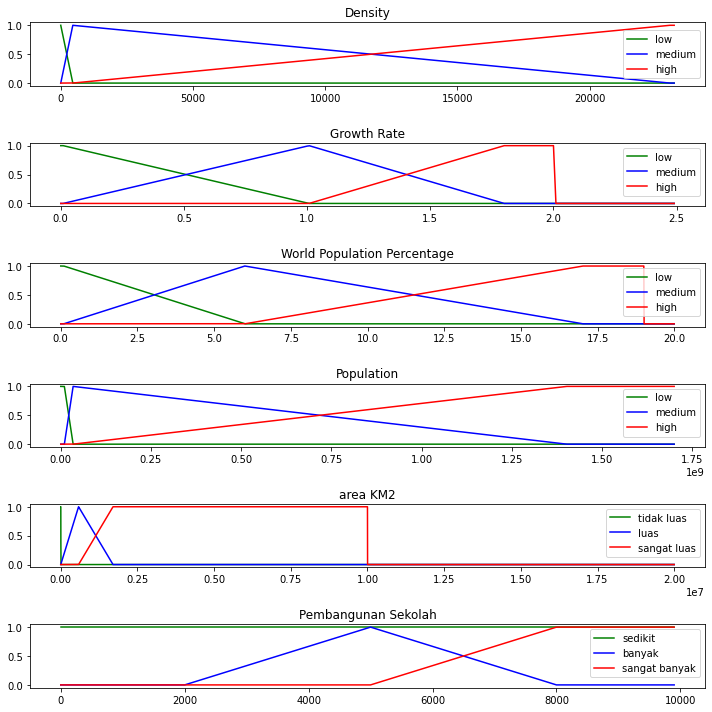


======================== NEGARA ============================
========================== China =============================

Populasi =  1425887337
Area =  9706961
Density =  146.8933
Growth Rate =  1.0
World Pop Percentage =  17.88



======== Fuzzifikasi/Fungsi Keanggotaan ========
Nilai Density:[ 0.675313634351483 | 0.3246863656485171 | 0.0 ]
Nilai Growth Rate:[ 0.008016032064128263 | 0.9919839679358717 | 0.0 ]
Nilai Populasi:[ 0.0 | 0.0 | 1.0 ]
Nilai area KM2:[ 0.0 | 0.0 | 1.0 ]
Nilai World Population Percentage:[ 0.0 | 0.0 | 1.0 ]

====== Inference Fuzzy ======
Nilai Himpunan Sekolah:[ 0.0 | 0.0 | 1.0 ]


Nilai Jumlah Pembangunan Sekolah =  8089.705882352941
Nilai Aktifasi Himpunan Sekolah =  1.0


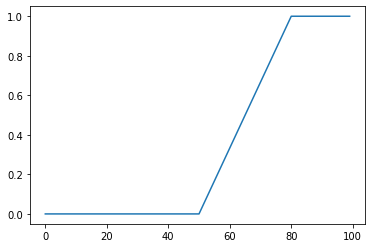

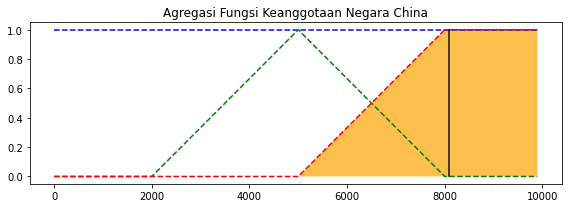





======================== NEGARA ============================
========================== India =============================

Populasi =  1417173173
Area =  3287590
Density =  431.0675
Growth Rate =  1.0068
World Pop Percentage =  17.77



======== Fuzzifikasi/Fungsi Keanggotaan ========
Nilai Density:[ 0.046331341301460834 | 0.9536686586985392 | 0.0 ]
Nilai Growth Rate:[ 0.0025651302605211156 | 0.9957176980223073 | 0.001717171717171696 ]
Nilai Populasi:[ 0.0 | 0.0 | 1.0 ]
Nilai area KM2:[ 0.0 | 0.0 | 1.0 ]
Nilai World Population Percentage:[ 0.0 | 0.0 | 1.0 ]

====== Inference Fuzzy ======
Nilai Himpunan Sekolah:[ 0.0 | 0.0 | 1.0 ]


Nilai Jumlah Pembangunan Sekolah =  8089.705882352941
Nilai Aktifasi Himpunan Sekolah =  1.0


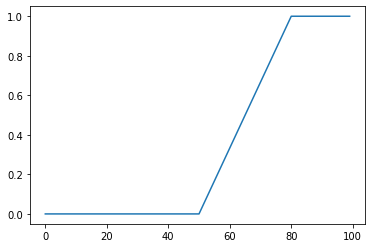

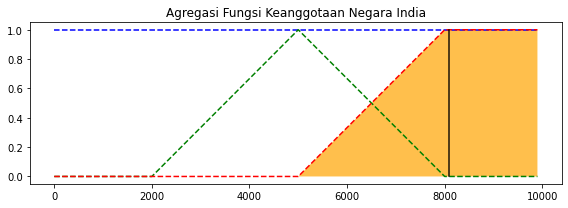





======================== NEGARA ============================
========================== United States =============================

Populasi =  338289857
Area =  9372610
Density =  36.0935
Growth Rate =  1.0038
World Pop Percentage =  nan



======== Fuzzifikasi/Fungsi Keanggotaan ========
Nilai Density:[ 0.9205544488711819 | 0.07944555112881804 | 0.0 ]
Nilai Growth Rate:[ 0.004969939879759505 | 0.9940704641606446 | 0.0009595959595959659 ]
Nilai Populasi:[ 0.0 | 0.7772402218155198 | 0.22275977818448023 ]
Nilai area KM2:[ 0.0 | 0.0 | 1.0 ]
Nilai World Population Percentage:[ nan | nan | nan ]

====== Inference Fuzzy ======
Nilai Himpunan Sekolah:[ 0.0 | 0.7772402218155198 | 0.22275977818448023 ]


Nilai Jumlah Pembangunan Sekolah =  5561.267563193171
Nilai Aktifasi Himpunan Sekolah =  0.7772402218155198


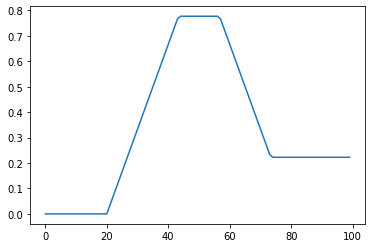

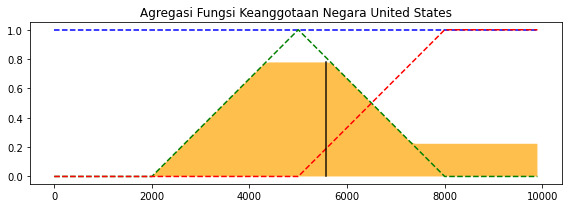





======================== NEGARA ============================
========================== Indonesia =============================

Populasi =  275501339
Area =  1904569
Density =  144.6529
Growth Rate =  1.0064
World Pop Percentage =  3.45



======== Fuzzifikasi/Fungsi Keanggotaan ========
Nilai Density:[ 0.6802724656927845 | 0.31972753430721557 | 0.0 ]
Nilai Growth Rate:[ 0.00288577154308621 | 0.9954980668407523 | 0.0016161616161616062 ]
Nilai Populasi:[ 0.0 | 0.8232054619326501 | 0.17679453806734993 ]
Nilai area KM2:[ 0.0 | 0.0 | 1.0 ]
Nilai World Population Percentage:[ 0.43220338983050843 | 0.5677966101694915 | 0.0 ]

====== Inference Fuzzy ======
Nilai Himpunan Sekolah:[ 0.0 | 0.43220338983050843 | 0.17679453806734993 ]


Nilai Jumlah Pembangunan Sekolah =  5604.370455280809
Nilai Aktifasi Himpunan Sekolah =  0.43220338983050843


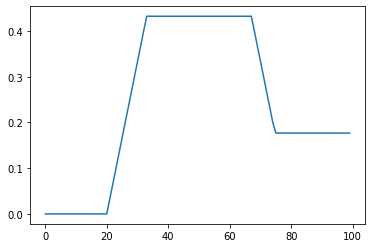

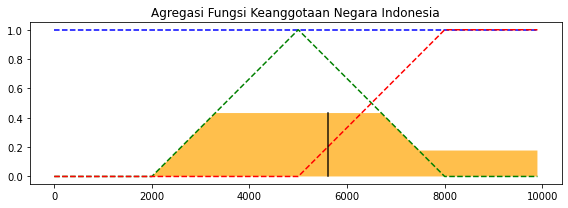





======================== NEGARA ============================
========================== Pakistan =============================

Populasi =  235824862
Area =  881912
Density =  267.4018
Growth Rate =  1.0191
World Pop Percentage =  2.96



======== Fuzzifikasi/Fungsi Keanggotaan ========
Nilai Density:[ 0.4085838866755202 | 0.5914161133244799 | 0.0 ]
Nilai Growth Rate:[ 0.0 | 0.9859848484848487 | 0.014015151515151373 ]
Nilai Populasi:[ 0.0 | 0.8522511991215227 | 0.1477488008784773 ]
Nilai area KM2:[ 0.0 | 0.731088471849866 | 0.2689115281501341 ]
Nilai World Population Percentage:[ 0.5152542372881356 | 0.48474576271186437 | 0.0 ]

====== Inference Fuzzy ======
Nilai Himpunan Sekolah:[ 0.0 | 0.5152542372881356 | 0.1477488008784773 ]


Nilai Jumlah Pembangunan Sekolah =  5461.365826504104
Nilai Aktifasi Himpunan Sekolah =  0.5152542372881356


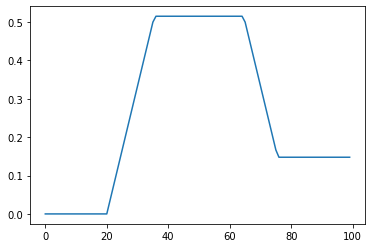

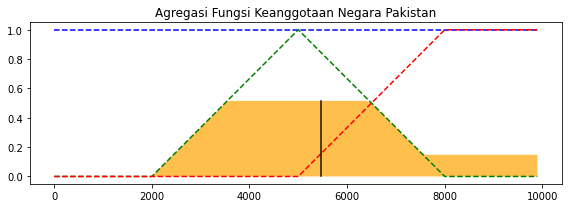

In [45]:
if __name__=="__main__":
    columns = ['Country', '2022 Population', 'Area (km²)', 'Density (per km²)', 'Growth Rate', 'World Population Percentage']
    result = {}
    for column in columns:
        result[f'{column}'] = getColumn(column)

    variable = variableFuzzy()
    data = {}
    # len(result['Country'])
    for i in range(5):
        data['country'] = result['Country'][i]
        data['population'] = result['2022 Population'][i]
        data['area'] = result['Area (km²)'][i]
        data['density'] = result['Density (per km²)'][i]
        data['grw'] = result['Growth Rate'][i]
        data['per'] = result['World Population Percentage'][i]

        print("======================== NEGARA ============================")
        print(f"========================== {data['country']} =============================")
        print("=======================================================\n")

        print("Populasi = ", data['population'])
        print("Area = ", data['area'])
        print("Density = ", data['density'])
        print("Growth Rate = ", data['grw'])
        print("World Pop Percentage = ", data['per'])
        print("\n\n")
        Fuzzyfikasi(data, variable)

        print("\n\n\n")
        data = {}
        # break